# Stock

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## BILI Inc

- import dataset

In [15]:
BILI = pd.read_csv('DataSet/BILI.csv', index_col=['Date'], parse_dates=['Date'])
BILI.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-22,16.160000,16.190001,15.750000,15.930000,15.930000,4492900
2019-01-23,16.190001,16.370001,15.840000,15.950000,15.950000,3083100
2019-01-24,16.090000,17.180000,16.000000,16.889999,16.889999,4376000
2019-01-25,17.219999,17.500000,16.969999,17.440001,17.440001,3764300
2019-01-28,17.139999,18.160000,16.799999,17.980000,17.980000,4097100
2019-01-29,17.990000,18.379999,17.670000,17.840000,17.840000,6344300
2019-01-30,18.190001,18.299999,17.680000,17.760000,17.760000,2807300
2019-01-31,18.280001,18.459999,17.959999,18.410000,18.410000,5100000
2019-02-01,18.299999,18.610001,17.750000,17.830000,17.830000,3082300


- Data cleaning

In [16]:
drop_cols = ['Adj Close','Volume' ]

BILI.drop(drop_cols, axis=1, inplace=True)
BILI.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,16.160000,16.190001,15.750000,15.930000
2019-01-23,16.190001,16.370001,15.840000,15.950000
2019-01-24,16.090000,17.180000,16.000000,16.889999
2019-01-25,17.219999,17.500000,16.969999,17.440001
2019-01-28,17.139999,18.160000,16.799999,17.980000


- Plot the closing price

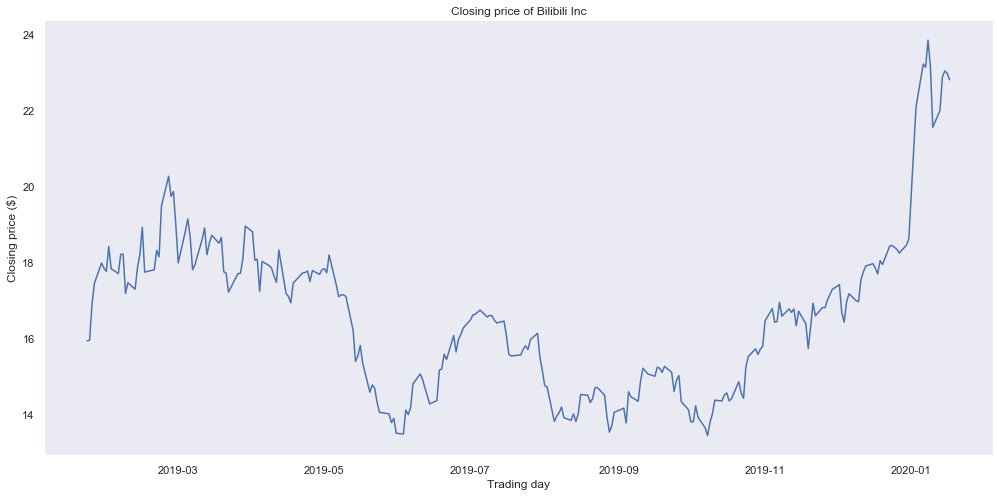

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(BILI.Close)
plt.title('Closing price of Bilibili Inc')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

- Double Exponential Smoothing

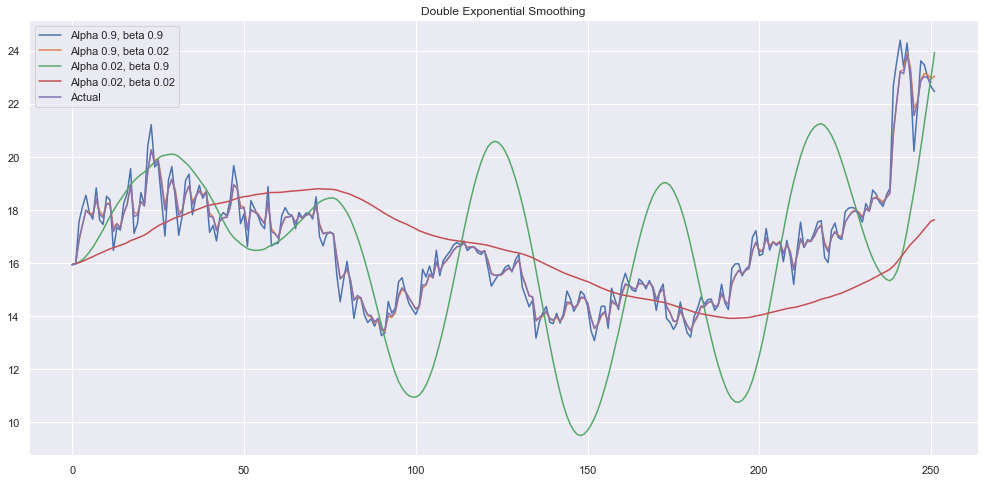

In [18]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(BILI.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

- Stationary

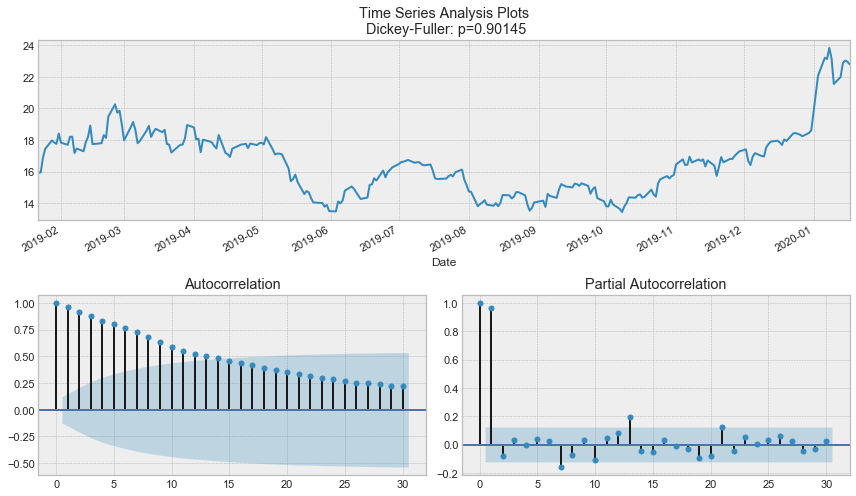

In [19]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(BILI.Close, lags=30)

- By the Dickey-Fuller test, the time series is non-stationary.

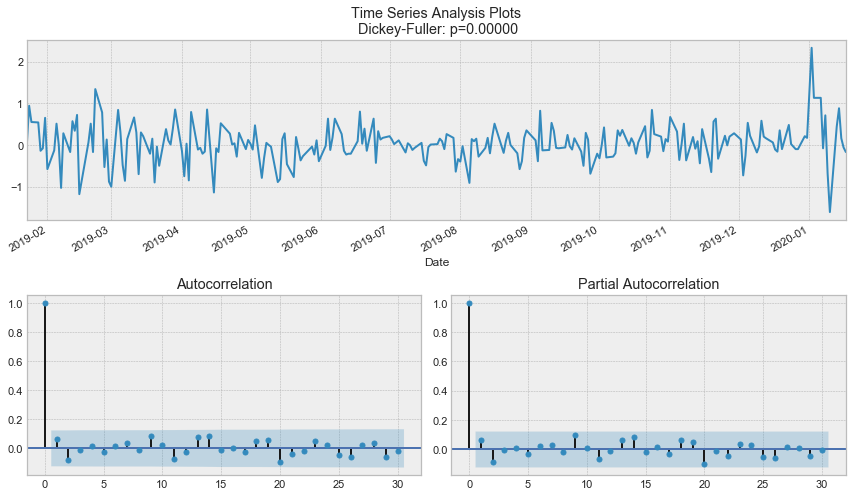

In [20]:
# Take the first difference to remove to make the process stationary
data_diff = BILI.Close - BILI.Close.shift(1)

tsplot(data_diff[1:], lags=30)

- Random Forests

In [21]:
BILI.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,16.160000,16.190001,15.750000,15.930000
2019-01-23,16.190001,16.370001,15.840000,15.950000
2019-01-24,16.090000,17.180000,16.000000,16.889999
2019-01-25,17.219999,17.500000,16.969999,17.440001
2019-01-28,17.139999,18.160000,16.799999,17.980000


In [22]:
### Data transformations
BILI.columns = [x.strip() for x in BILI.columns]
BILI.columns = [x.replace(' ', '_') for x in BILI.columns]

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [24]:
BILI.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [25]:
pd.concat([BILI.Close, BILI.Close.shift(-1)], axis=1)

,Close,Close
Date,,
2019-01-22,15.930000,15.950000
2019-01-23,15.950000,16.889999
2019-01-24,16.889999,17.440001
2019-01-25,17.440001,17.980000
2019-01-28,17.980000,17.840000
...,...,...
2020-01-13,21.990000,22.870001
2020-01-14,22.870001,23.030001
2020-01-15,23.030001,22.969999


In [120]:
def valid(col):
    return 'Close' not in col
BILI = BILI.dropna()
res = 1
d = 1
score = []
day = []
while res > 0.7:
    X = BILI[[x for x in BILI.columns if valid(x)]].iloc[:-d]
    y = BILI.Close.shift(-d).dropna()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    res = rf_model.score(X_test, y_test)
    score.append(res)
    day.append(d)
    d+=1

In [121]:
score

[0.9256455840553178,
 0.8629019240172301,
 0.8000288159682072,
 0.8290729212648862,
 0.8145058085832356,
 0.775158307556746,
 0.7360988392297757,
 0.7167491191664531,
 0.5967823594828567]

In [122]:
day

[1, 2, 3, 4, 5, 6, 7, 8, 9]

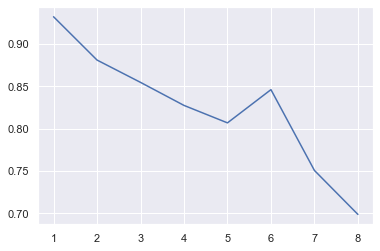

In [208]:
plt.plot(day,score)

In [102]:
X.T

Date,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-04,...,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31,2020-01-02,2020-01-03,2020-01-06
Open,16.160000,16.190001,16.09,17.219999,17.139999,17.990000,18.190001,18.280001,18.299999,17.889999,...,18.09,18.000000,18.440001,18.450001,18.309999,18.200001,18.549999,19.469999,20.549999,21.459999
High,16.190001,16.370001,17.18,17.500000,18.160000,18.379999,18.299999,18.459999,18.610001,18.049999,...,18.50,18.500000,18.570000,18.469000,18.400000,18.590000,19.170000,21.889999,22.590000,23.450001
Low,15.750000,15.840000,16.00,16.969999,16.799999,17.670000,17.680000,17.959999,17.750000,17.469999,...,17.91,17.959999,18.334999,18.240000,18.100000,18.129999,18.475000,19.299999,20.530001,21.410000


In [103]:
rf_model = RandomForestRegressor()

In [104]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
y_pred = rf_model.predict(X_test)

In [107]:
type(y_pred)

numpy.ndarray

In [108]:
y_pred[0:10]

array([18.29340037, 17.47580049, 14.4875    , 17.11509996, 18.06409946,
       16.16179937, 14.75849987, 14.1403    , 17.59329995, 15.80299995])

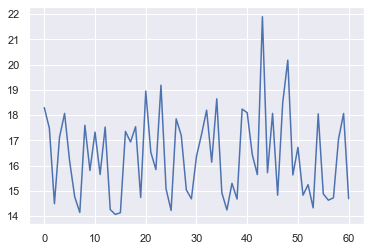

In [109]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

We need to convert a pandas series to a numpy array:

In [110]:
type(y_test)

pandas.core.series.Series

In [111]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [112]:
y_test2[0:10]

array([18.6     , 17.860001, 15.21    , 17.41    , 21.99    , 16.709999,
       16.780001, 14.34    , 17.74    , 15.58    ])

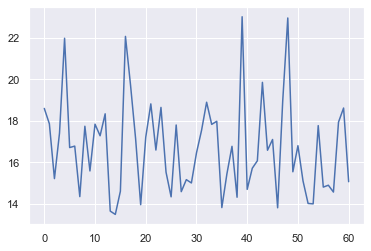

In [113]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

Now let's plot predictions on top of test labels to see if we have a match. We'll plot one under the other and then reverse them to see if the mismatch is big or not:

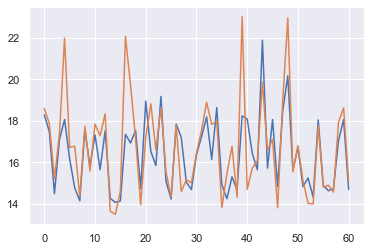

In [114]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

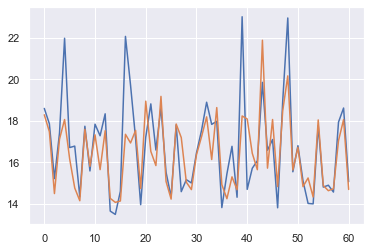

In [115]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [116]:
type(y_test)

pandas.core.series.Series

In [117]:
pd.concat([pd.Series(y_pred), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,18.293400,18.600000
1,17.475800,17.860001
2,14.487500,15.210000
3,17.115100,17.410000
4,18.064099,21.990000
...,...,...
56,14.626300,14.890000
57,14.721200,14.560000
58,17.045100,17.940001
59,18.060600,18.620001


In [118]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('High', 0.6179358580014702),
 ('Low', 0.24338197201863077),
 ('Open', 0.13868216997989904)]

## NTDOY Inc

- import dataset

In [125]:
NTDOY = pd.read_csv('DataSet/NTDOY.csv', index_col=['Date'], parse_dates=['Date'])
NTDOY.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-22,38.299999,38.610001,37.919998,38.020000,36.995495,600300
2019-01-23,38.320000,38.689999,38.029999,38.290001,37.258217,291000
2019-01-24,38.779999,38.810001,38.500000,38.740002,37.696095,163800
2019-01-25,38.810001,38.810001,38.630001,38.700001,37.657169,358300
2019-01-28,37.320000,37.450001,36.639999,37.000000,36.002979,469800
2019-01-29,38.150002,38.360001,38.090000,38.160000,37.131721,465300
2019-01-30,38.000000,38.750000,38.000000,38.700001,37.657169,428400
2019-01-31,37.590000,37.599998,36.770000,37.240002,36.236515,769600
2019-02-01,35.240002,35.669998,35.200001,35.419998,34.465553,572800


- Data cleaning

In [126]:
drop_cols = ['Adj Close','Volume' ]

NTDOY.drop(drop_cols, axis=1, inplace=True)
NTDOY.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,38.299999,38.610001,37.919998,38.020000
2019-01-23,38.320000,38.689999,38.029999,38.290001
2019-01-24,38.779999,38.810001,38.500000,38.740002
2019-01-25,38.810001,38.810001,38.630001,38.700001
2019-01-28,37.320000,37.450001,36.639999,37.000000


- Plot the closing price

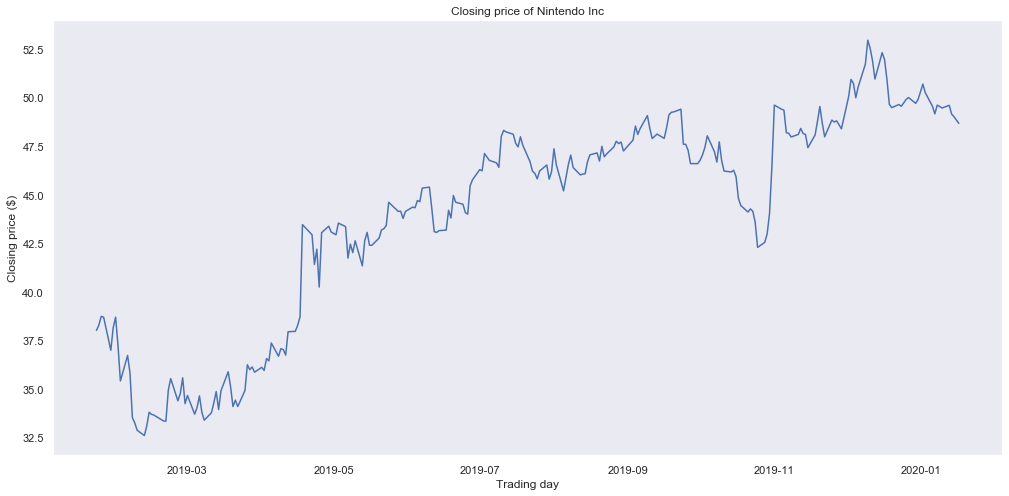

In [127]:
plt.figure(figsize=(17, 8))
plt.plot(NTDOY.Close)
plt.title('Closing price of Nintendo Inc')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

- Double Exponential Smoothing

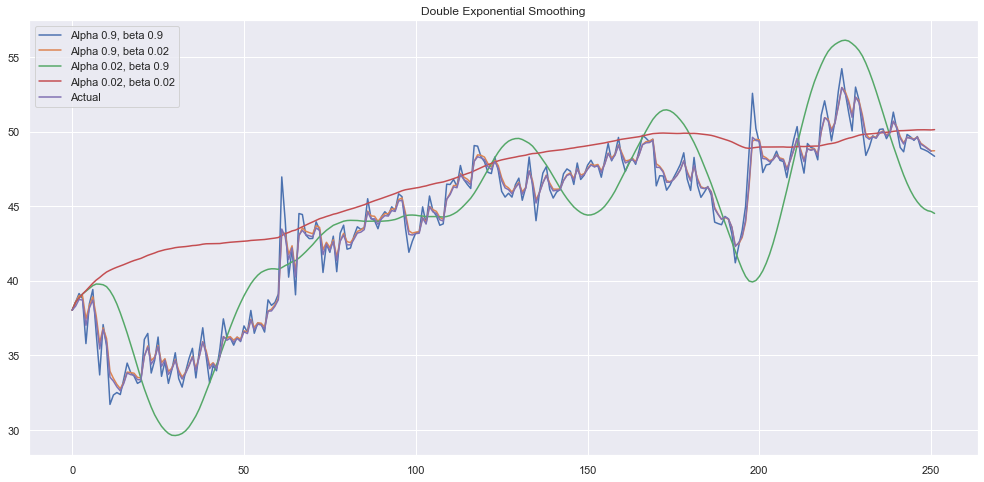

In [128]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(NTDOY.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

- stationary

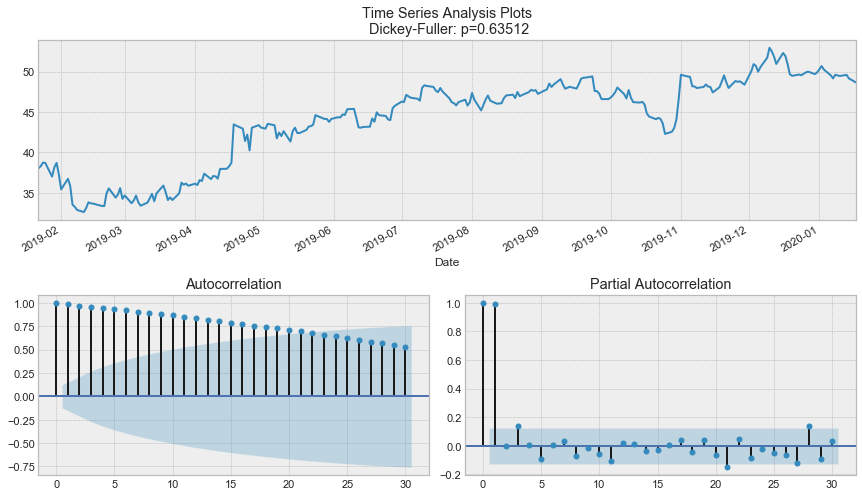

In [129]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(NTDOY.Close, lags=30)

- By the Dickey-Fuller test, the time series is non-stationary.

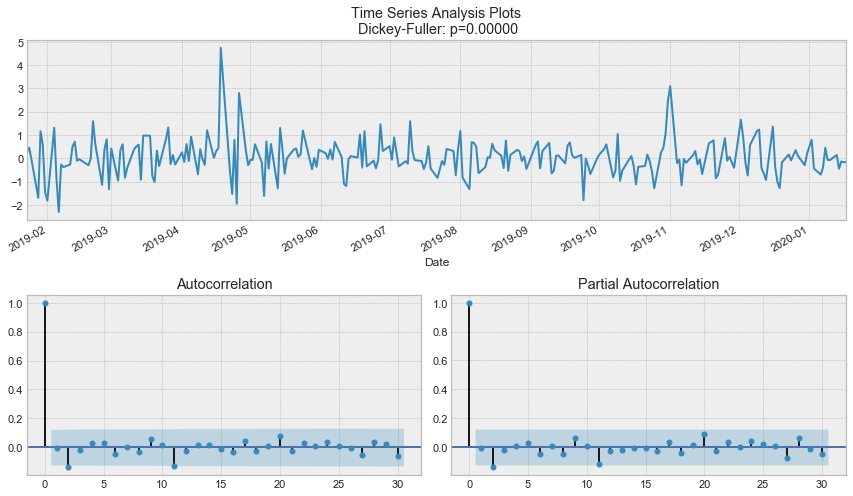

In [130]:
# Take the first difference to remove to make the process stationary
data_diff = NTDOY.Close - NTDOY.Close.shift(1)

tsplot(data_diff[1:], lags=30)

- Random Forests

In [131]:
NTDOY.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,38.299999,38.610001,37.919998,38.020000
2019-01-23,38.320000,38.689999,38.029999,38.290001
2019-01-24,38.779999,38.810001,38.500000,38.740002
2019-01-25,38.810001,38.810001,38.630001,38.700001
2019-01-28,37.320000,37.450001,36.639999,37.000000


In [132]:
### Data transformations
NTDOY.columns = [x.strip() for x in BILI.columns]
NTDOY.columns = [x.replace(' ', '_') for x in BILI.columns]

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [134]:
NTDOY.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [135]:
pd.concat([NTDOY.Close, NTDOY.Close.shift(-1)], axis=1)

,Close,Close
Date,,
2019-01-22,38.020000,38.290001
2019-01-23,38.290001,38.740002
2019-01-24,38.740002,38.700001
2019-01-25,38.700001,37.000000
2019-01-28,37.000000,38.160000
...,...,...
2020-01-13,49.599998,49.150002
2020-01-14,49.150002,49.009998
2020-01-15,49.009998,48.840000


In [136]:
def valid(col):
    return 'Close' not in col
NTDOY = NTDOY.dropna()
X = NTDOY[[x for x in NTDOY.columns if valid(x)]].iloc[:-1]
y = NTDOY.Close.shift(-1).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [137]:
def valid(col):
    return 'Close' not in col
NTDOY = NTDOY.dropna()
res = 1
d = 1
score = []
day = []
while res > 0.7:
    X = NTDOY[[x for x in NTDOY.columns if valid(x)]].iloc[:-d]
    y = NTDOY.Close.shift(-d).dropna()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    res = rf_model.score(X_test, y_test)
    score.append(res)
    day.append(d)
    d+=1

In [138]:
score

[0.9542169400377006,
 0.9238716916854318,
 0.9113877325062276,
 0.9062138287464869,
 0.8747773464894244,
 0.8676377847575633,
 0.8662840774941505,
 0.8661986842654511,
 0.8420962052547123,
 0.8237522544296275,
 0.8016303312718086,
 0.7962964217943082,
 0.7972751252488219,
 0.7657561117420052,
 0.7288879631342284,
 0.7671771119264987,
 0.755997577161892,
 0.7401664129809188,
 0.7396431566501186,
 0.7261722730123868,
 0.7202013854110749,
 0.6717022146348945]

In [139]:
day

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

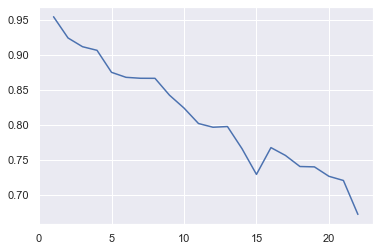

In [140]:
plt.plot(day,score)

In [141]:
X.T

Date,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-04,...,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-16
Open,38.299999,38.320000,38.779999,38.810001,37.320000,38.150002,38.00,37.590000,35.240002,36.549999,...,50.549999,50.650002,50.299999,50.330002,51.689999,53.150002,52.700001,51.380001,51.259998,51.750000
High,38.610001,38.689999,38.810001,38.810001,37.450001,38.360001,38.75,37.599998,35.669998,36.730000,...,51.049999,51.060001,50.580002,50.580002,51.889999,53.240002,52.700001,52.040001,51.259998,52.419998
Low,37.919998,38.029999,38.500000,38.630001,36.639999,38.090000,38.00,36.770000,35.200001,35.770000,...,50.540001,50.650002,49.990002,50.160000,51.639999,52.799999,52.330002,51.380001,50.849998,51.750000


In [142]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
y_pred = rf_model.predict(X_test)

In [155]:
type(y_pred)

numpy.ndarray

In [156]:
y_pred[0:10]

array([49.24320044, 44.34619951, 42.37990098, 46.77970092, 35.39980108,
       49.96540003, 36.95850109, 44.32970002, 46.07810015, 47.64739997])

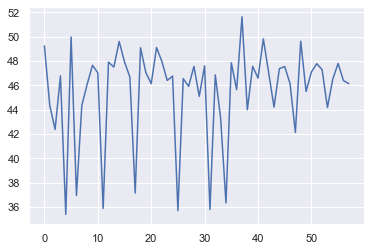

In [157]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

We need to convert a pandas series to a numpy array:

In [158]:
type(y_test)

pandas.core.series.Series

In [159]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [160]:
y_test2[0:10]

array([49.900002, 44.150002, 33.810001, 48.84    , 34.919998, 50.73    ,
       35.869999, 48.799999, 47.049999, 46.950001])

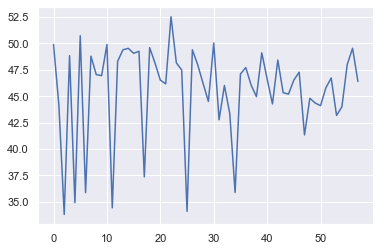

In [161]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

Now let's plot predictions on top of test labels to see if we have a match. We'll plot one under the other and then reverse them to see if the mismatch is big or not:

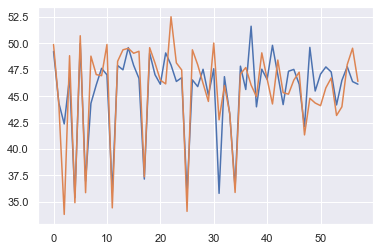

In [162]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

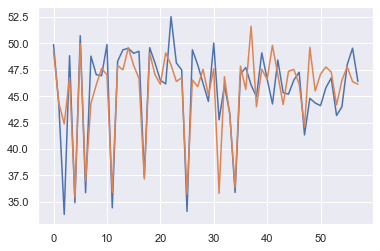

In [163]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [164]:
type(y_test)

pandas.core.series.Series

In [165]:
pd.concat([pd.Series(y_pred), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,49.243200,49.900002
1,44.346200,44.150002
2,42.379901,33.810001
3,46.779701,48.840000
4,35.399801,34.919998
5,49.965400,50.730000
6,36.958501,35.869999
7,44.329700,48.799999
8,46.078100,47.049999
9,47.647400,46.950001


In [166]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Open', 0.39212886658325885),
 ('High', 0.3156944645311691),
 ('Low', 0.29217666888557203)]

## BYND Inc

- import dataset

In [167]:
BYND = pd.read_csv('DataSet/BYND.csv', index_col=['Date'], parse_dates=['Date'])
BYND.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-02,46.000000,72.949997,45.000000,65.750000,65.750000,23119000
2019-05-03,72.000000,74.000000,65.660004,66.790001,66.790001,13139400
2019-05-06,62.730000,74.839996,62.500000,74.790001,74.790001,8746200
2019-05-07,77.139999,85.449997,75.000000,79.169998,79.169998,16532100
2019-05-08,83.610001,85.379997,70.785004,72.250000,72.250000,14696300
2019-05-09,70.500000,73.199997,67.099998,68.269997,68.269997,6284500
2019-05-10,69.089996,69.332001,61.599998,66.220001,66.220001,4888000
2019-05-13,65.459999,71.959999,63.360001,69.500000,69.500000,4773400
2019-05-14,72.480003,80.750000,71.120003,79.680000,79.680000,7079600


- Data cleaning

In [168]:
drop_cols = ['Adj Close','Volume' ]

BYND.drop(drop_cols, axis=1, inplace=True)
BYND.head()

,Open,High,Low,Close
Date,,,,
2019-05-02,46.000000,72.949997,45.000000,65.750000
2019-05-03,72.000000,74.000000,65.660004,66.790001
2019-05-06,62.730000,74.839996,62.500000,74.790001
2019-05-07,77.139999,85.449997,75.000000,79.169998
2019-05-08,83.610001,85.379997,70.785004,72.250000


- Plot the closing price

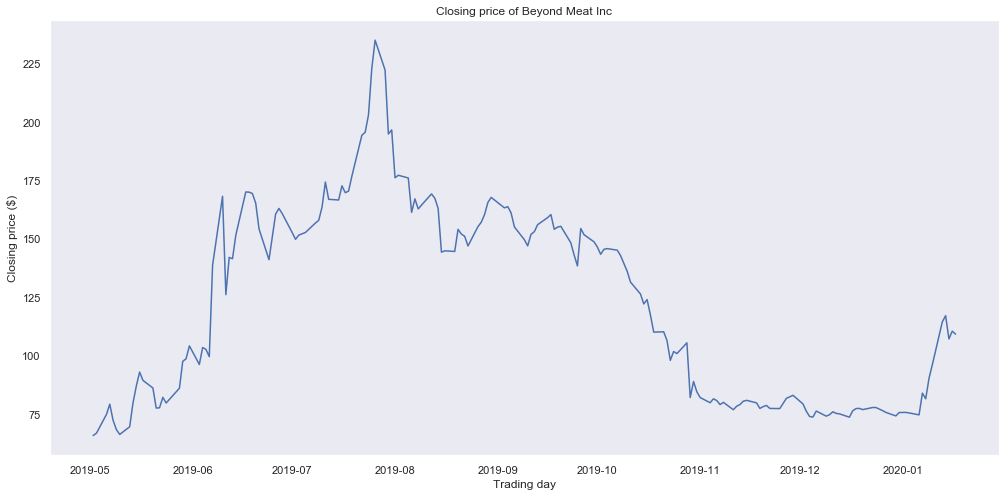

In [169]:
plt.figure(figsize=(17, 8))
plt.plot(BYND.Close)
plt.title('Closing price of Beyond Meat Inc')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

- Double Exponential Smoothing

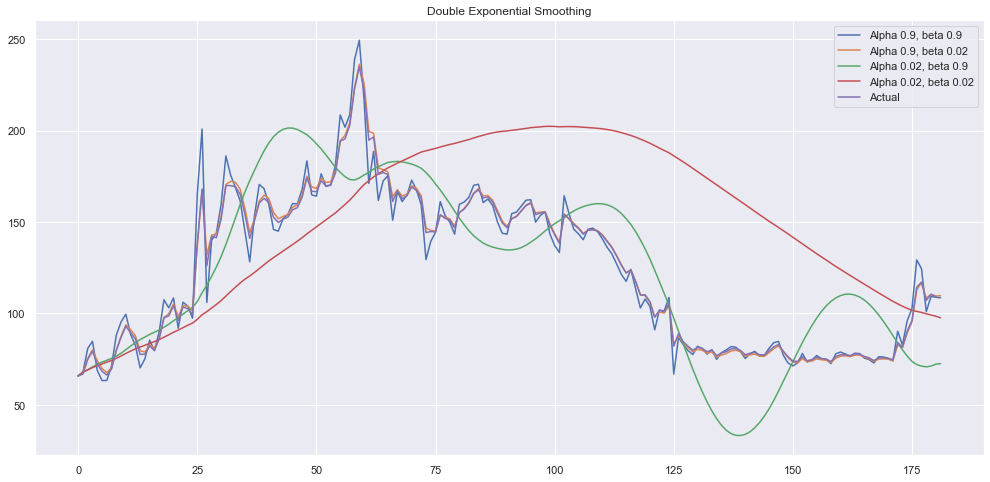

In [170]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(BYND.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

- Stationary

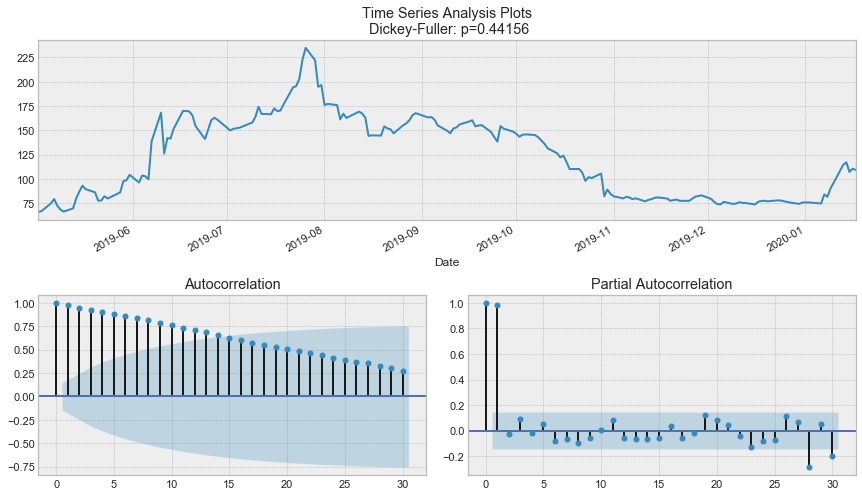

In [171]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(BYND.Close, lags=30)

- By the Dickey-Fuller test, the time series is non-stationary.

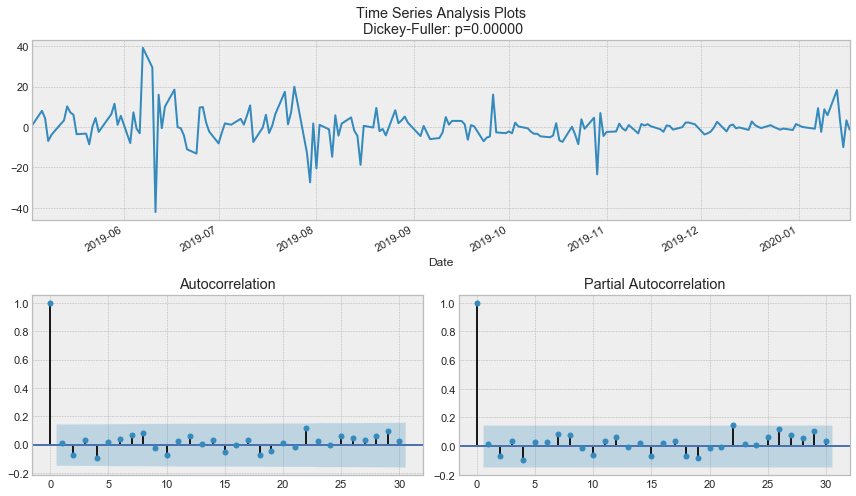

In [172]:
# Take the first difference to remove to make the process stationary
data_diff = BYND.Close - BYND.Close.shift(1)

tsplot(data_diff[1:], lags=30)

- Random Forests

In [173]:
BYND.head()

,Open,High,Low,Close
Date,,,,
2019-05-02,46.000000,72.949997,45.000000,65.750000
2019-05-03,72.000000,74.000000,65.660004,66.790001
2019-05-06,62.730000,74.839996,62.500000,74.790001
2019-05-07,77.139999,85.449997,75.000000,79.169998
2019-05-08,83.610001,85.379997,70.785004,72.250000


In [174]:
### Data transformations
BYND.columns = [x.strip() for x in BYND.columns]
BYND.columns = [x.replace(' ', '_') for x in BYND.columns]

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [176]:
BYND.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [177]:
pd.concat([BYND.Close, BYND.Close.shift(-10)], axis=1)

,Close,Close
Date,,
2019-05-02,65.750000,92.919998
2019-05-03,66.790001,89.349998
2019-05-06,74.790001,86.089996
2019-05-07,79.169998,77.500000
2019-05-08,72.250000,77.629997
...,...,...
2020-01-13,114.339996,NaN
2020-01-14,117.050003,NaN
2020-01-15,107.080002,NaN


In [201]:
def valid(col):
    return 'Close' not in col
BYND = BYND.dropna()
res = 1
d = 1
score = []
day = []
while res > 0.7:
    X = BYND[[x for x in BYND.columns if valid(x)]].iloc[:-d]
    y = BYND.Close.shift(-d).dropna()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    res = rf_model.score(X_test, y_test)
    score.append(res)
    day.append(d)
    d+=1

In [180]:
score

[0.9366784872456443,
 0.8860133629117893,
 0.8506442722934067,
 0.8338137261089087,
 0.8105781411641358,
 0.8527882564065491,
 0.7711610072672206,
 0.7121887485366578,
 0.6173091170048868]

In [181]:
day

[1, 2, 3, 4, 5, 6, 7, 8, 9]

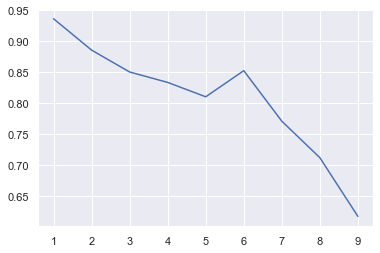

In [182]:
plt.plot(day,score)

In [183]:
X.T

Date,2019-05-02,2019-05-03,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-13,2019-05-14,2019-05-15,...,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31,2020-01-02,2020-01-03,2020-01-06
Open,46.000000,72.000000,62.730000,77.139999,83.610001,70.500000,69.089996,65.459999,72.480003,79.000000,...,76.879997,76.879997,78.019997,78.250000,76.730003,75.760002,73.550003,76.230003,75.120003,74.970001
High,72.949997,74.000000,74.839996,85.449997,85.379997,73.199997,69.332001,71.959999,80.750000,93.000000,...,77.000000,78.459999,79.279999,78.579002,77.419998,75.949997,75.730003,77.199997,76.199997,75.750000
Low,45.000000,65.660004,62.500000,75.000000,70.785004,67.099998,61.599998,63.360001,71.120003,74.550003,...,75.070000,76.629997,76.939003,76.050003,75.139999,73.599998,73.220001,75.260002,74.314003,73.830002


In [184]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [204]:
rf_model.predict(X_test)

array([ 83.63669926, 153.27899973, 138.74209968, 166.84580192,
       102.92160177,  80.92760136, 153.76619882,  81.2275022 ,
       118.93400051, 137.39629971, 128.0759989 , 161.54979714,
       149.98200165, 153.68879905, 153.73949759,  91.89669961,
       118.55469879, 170.94030089, 113.24640137,  87.89570144,
       155.8542021 , 151.63040322,  81.14630179, 132.52179982,
       171.68679621, 198.56379931,  78.27600092, 114.93280019,
        85.8408488 ,  77.66059841, 156.27479979, 100.31679799,
        94.4984975 ,  78.42190049,  95.63460088, 100.96949814,
        78.69099941,  84.28589941, 181.14000077,  97.80584658,
       157.78009825,  95.86680009,  82.71729828, 157.1588022 ])

In [205]:
y_pred = rf_model.predict(X_test)

In [188]:
type(y_pred)

numpy.ndarray

In [189]:
y_pred[0:10]

array([152.15749874,  79.26880103,  78.13169935, 164.74999934,
        84.87930004,  75.23050169, 155.77220189,  79.06780228,
       100.1122025 , 154.28670022])

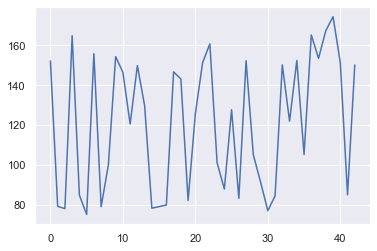

In [190]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

We need to convert a pandas series to a numpy array:

In [191]:
type(y_test)

pandas.core.series.Series

In [192]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [193]:
y_test2[0:10]

array([163.149994,  82.959999,  77.360001, 164.369995,  76.400002,
        90.25    , 158.970001,  73.660004, 100.809998, 160.679993])

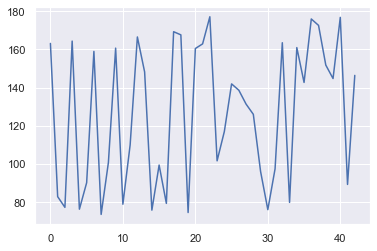

In [194]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

Now let's plot predictions on top of test labels to see if we have a match. We'll plot one under the other and then reverse them to see if the mismatch is big or not:

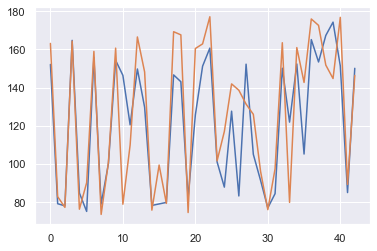

In [195]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

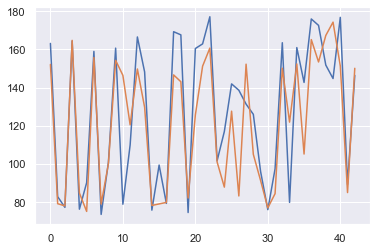

In [196]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [197]:
type(y_test)

pandas.core.series.Series

In [198]:
pd.concat([pd.Series(y_pred), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,152.157499,163.149994
1,79.268801,82.959999
2,78.131699,77.360001
3,164.749999,164.369995
4,84.879300,76.400002
5,75.230502,90.250000
6,155.772202,158.970001
7,79.067802,73.660004
8,100.112203,100.809998
9,154.286700,160.679993


In [199]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('High', 0.6691801850659879),
 ('Low', 0.19723887470386714),
 ('Open', 0.13358094023014497)]